<a href="https://colab.research.google.com/github/arbeeorlar/data_science/blob/main/MLS_Articles_Categorization_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Word Embedding</center></h1>

<center><p float="center">
  <img src="https://images.pexels.com/photos/242492/pexels-photo-242492.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" width="720"/>
</p></center>

<center><font size=6>Articles Categorization</center></font>

## Problem Statement

### Business Context

In the dynamic landscape of the media and news industry, the ability to swiftly categorize and curate content has become a strategic imperative. The vast volume of information demands efficient systems to organize and present content to the audience.

The media industry, being the pulse of information dissemination, grapples with the continuous influx of articles spanning diverse topics. Ensuring that the right articles reaches the right audience promptly is not just a logistical necessity but a critical component in retaining and engaging audiences in an age of information overload.

Common Industry Challenges:
Amidst the ceaseless flow of news, media organizations encounter challenges such as:
- Information Overload: The sheer volume of articles makes manual categorization impractical.
- Timeliness: Delays in categorizing articles can result in outdated or misplaced content.
- User Engagement: Providing personalized and relevant content is vital for sustaining user interest.

### Problem Definition

InfoWorld, a prominent player in the media landscape, faces these challenges on a monumental scale. With a vast repository of articles covering global affairs, entertainment, politics, and more, the need for an advanced and automated system to categorize articles has become increasingly evident. The manual efforts required for categorizing such a diverse range of articles are substantial, often leading to delays and potential inaccuracies. To streamline and optimize this process, the organization recognizes the imperative of adopting cutting-edge technologies, particularly machine learning, to automate and enhance the categorization of content.

As a data scientist on InfoWorld's data team, the task is to analyze articles and construct a predictive model for categorizing them. The goal is to optimize the categorization process, ensuring timely and personalized delivery. Leveraging advanced machine learning techniques, the initiative aims to address technical challenges and pave the way for a seamless intersection of technology and media.

### Data Dictionary

- Date published: The date when the article or content was officially released or made public.
- Category: Categorization indicating the broad topic or subject of the content.
- Section: Subdivision within the publication that helps classify the content further.
- Headline: Brief and catchy title summarizing the main idea or topic of the content.
- Description: A short summary or overview of the content, providing additional context.
- Keywords: Relevant keywords or tags associated with the content for search engine optimization.
- Article text: The main body of the article or content containing detailed information and context.

## Installing and Importing the Necessary libraries

In [5]:
!pip uninstall -y numpy pandas scipy matplotlib seaborn scikit-learn gensim


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: matplotlib 3.9.2
Uninstalling matplotlib-3.9.2:
  Successfully uninstalled matplotlib-3.9.2
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3


In [1]:
!pip install -U \
  numpy==1.26.4 \
  pandas==2.2.2 \
  scipy==1.13.1 \
  matplotlib==3.9.2 \
  seaborn==0.13.2 \
  scikit-learn==1.5.1 \
  gensim==4.3.3 \
  -q


In [2]:
import numpy as np, pandas as pd, scipy, sklearn, gensim
print("✅ All good!")
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)

✅ All good!
NumPy: 1.26.4
Pandas: 2.2.2


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [3]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# To import Word2Vec
from gensim.models import Word2Vec

# To tune the model
from sklearn.model_selection import GridSearchCV

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Loading the dataset

In [5]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/NLP/Week -1 /Articles.csv')

In [7]:
# creating a copy of the dataset
data = df.copy()

## Data Overview

### Checking the first five rows of the data

In [8]:
# Print first 5 rows of data
data.head()

Date published  Category    Section  \
0  2021-07-15 02:46:59      news      world   
1  2021-05-12 07:52:09      news      world   
2  2021-06-16 02:51:30      news       asia   
3  2022-03-15 09:57:36  business  investing   
4  2022-03-15 11:27:02  business   business   

                                                                                        Headline  \
0  There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN   
1                Bioservo's robotic 'Ironhand' could protect factory workers from injuries - CNN   
2                                      This swarm of robots gets smarter the more it works - CNN   
3                  Russia is no longer an option for investors. These emerging markets are - CNN   
4                             Russian energy investment ban part of new EU sanctions wave  - CNN   

                                                                                                                                                                                                                                              Description  \
0                                                                                                                                   The e-commerce boom has exacerbated a global truck driver shortage, but could autonomous trucks help fix the problem?   
1                                            Working in a factory can mean doing the same task over and over, which could lead to chronic injury.  A battery-powered glove from Swedish company Bioservo could help workers by taking some of the strain.   
2                                                                                 In a Hong Kong warehouse, a swarm of autonomous robots works 24/7. They're not just working hard, they're working smart; as they operate, they get better at their job.   
3                                                                                                                 For many years, the world's most popular emerging markets have been the so-called BRICS: Brazil, Russia, India, China and South Africa.   
4  The European Union formally approved on Tuesday a new barrage of sanctions against Russia for its invasion of Ukraine, which include bans on investments in the Russian energy sector, luxury goods exports and imports of steel products from Russia.   

                                                                                               Keywords  \
0  world, There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN   
1                world, Bioservo's robotic 'Ironhand' could protect factory workers from injuries - CNN   
2                                       asia, This swarm of robots gets smarter the more it works - CNN   
3              investing, Russia is no longer an option for investors. These emerging markets are - CNN   
4                          business, Russian energy investment ban part of new EU sanctions wave  - CNN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [9]:
# checking an article
data.loc[3, 'Article text']

'New York (CNN Business)For many years, the world\'s most popular emerging markets have been the so-called BRICS: Brazil, Russia, India, China and South Africa.But given that Russia is no longer a market that Westerners can access following the invasion of Ukraine, it might be time for investors to stop lumping all of the emerging markets together."The BRICS had their day in the sun and that has faded," said Eric Winograd, senior economist at AllianceBernstein.Several major US index providers have removed Russian stocks from indexes at a price of "zero" or "effectively zero." Trading shares of several leading US-listed Russian companies, such as search engine Yandex and telecom MTS, have been halted. And the Moscow Stock Exchange has been closed since February 25, the day after the invasion.Russia could default on its debt within days"The idea that a country as large as Russia can be removed from indexes is a big deal," Winograd said.Read MoreIt seems likely that Russia will not be inc

### Checking the shape of the dataset

In [10]:
# print shape of data
data.shape

(4076, 7)

* The data comprises of ~4k articles

### Checking for missing values

In [11]:
# Check for missing values
data.isnull().sum()

,0
Date published,0
Category,0
Section,0
Headline,0
Description,0
Keywords,0
Article text,0


- There are no mising values in the data

### Checking the statistical summary

In [12]:
data.describe().T

count unique  \
Date published  4076   4076   
Category        4076      6   
Section         4076     37   
Headline        4076   4071   
Description     4076   4069   
Keywords        4076   4071   
Article text    4076   4075   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

- There seem to a large number of articles from the sports category

## Exploratory Data Analysis (EDA)


In [13]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### Distribution of article categories

/tmp/ipython-input-3020376056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


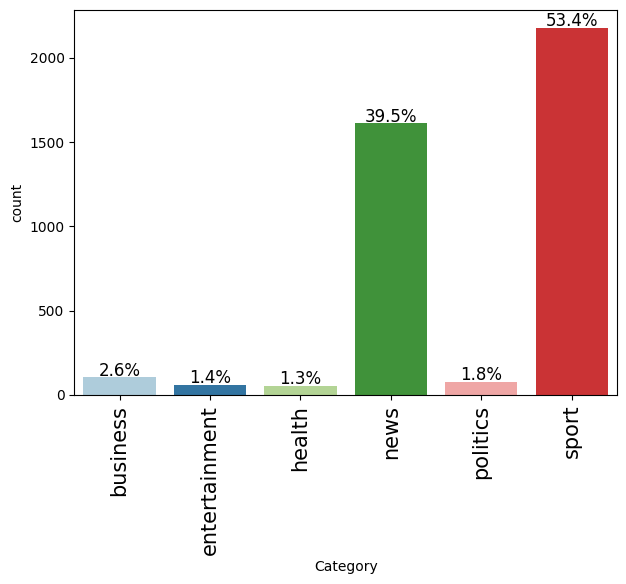

In [14]:
labeled_barplot(data, "Category", perc=True)

- Majority of the articles in the data are sports articles (53%), followed by news articles (~40%)

#### Distribution of section

/tmp/ipython-input-3020376056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


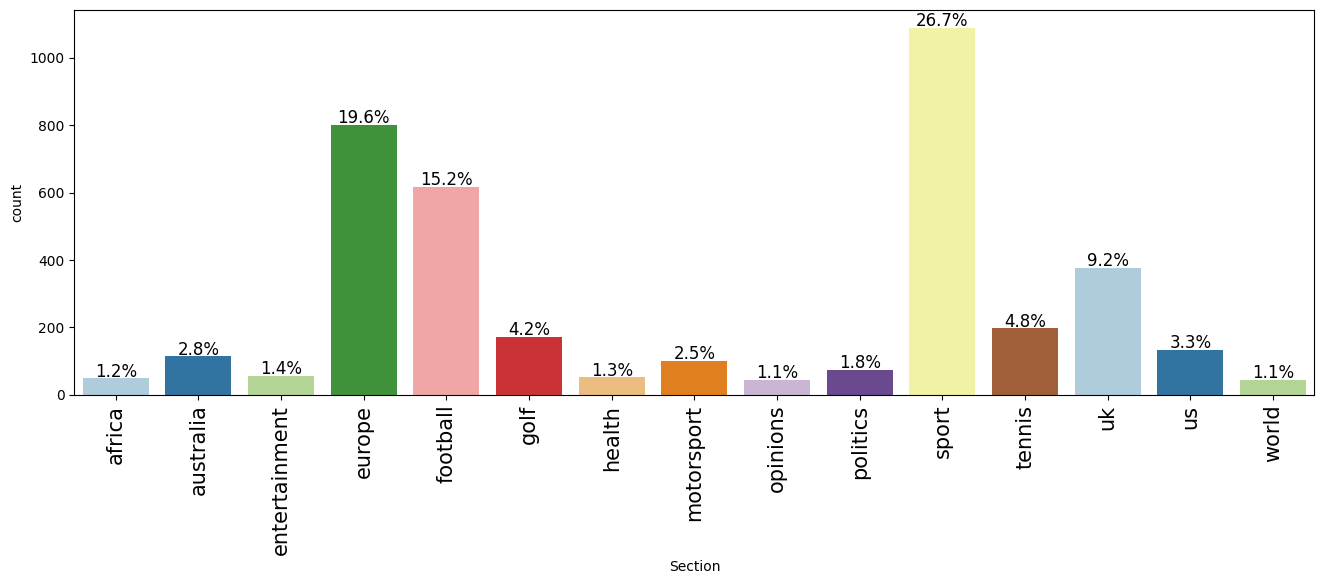

In [15]:
labeled_barplot(data, "Section", perc=True, n = 15)

* The most common section articles in the data belong to are sports, europe, and football

#### Distribution of the year of publishing

In [16]:
data['year'] = pd.to_datetime(data['Date published']).dt.year

/tmp/ipython-input-3020376056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


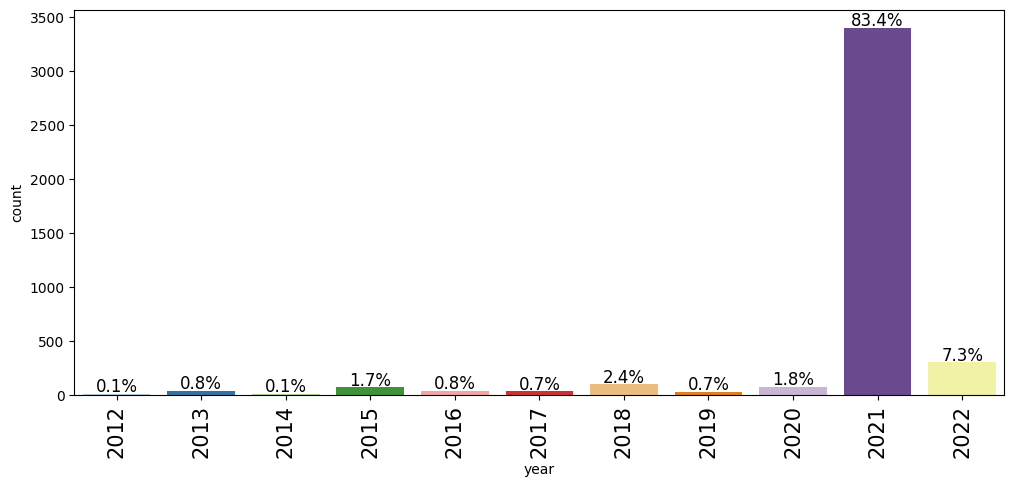

In [17]:
labeled_barplot(data, "year", perc=True)

- Most of the articles are from the year 2021

## Data Preprocessing

In [18]:
dataset = data.copy()

#### **Preprocessing the textual column**

In [19]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [20]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Split text into separate words
    words = text.split()


    # Removing English language stopwords
    text = ' '.join([word for word in words if word not in stopwords.words('english')])

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    text = ' '.join([ps.stem(word) for word in words])

    return text

In [21]:
# preprocessing the textual column
dataset['Article_text_clean'] = dataset['Article text'].apply(preprocess_text)

In [22]:
dataset.head()

Date published  Category    Section  \
0  2021-07-15 02:46:59      news      world   
1  2021-05-12 07:52:09      news      world   
2  2021-06-16 02:51:30      news       asia   
3  2022-03-15 09:57:36  business  investing   
4  2022-03-15 11:27:02  business   business   

                                                                                        Headline  \
0  There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN   
1                Bioservo's robotic 'Ironhand' could protect factory workers from injuries - CNN   
2                                      This swarm of robots gets smarter the more it works - CNN   
3                  Russia is no longer an option for investors. These emerging markets are - CNN   
4                             Russian energy investment ban part of new EU sanctions wave  - CNN   

                                                                                                                                                                                                                                              Description  \
0                                                                                                                                   The e-commerce boom has exacerbated a global truck driver shortage, but could autonomous trucks help fix the problem?   
1                                            Working in a factory can mean doing the same task over and over, which could lead to chronic injury.  A battery-powered glove from Swedish company Bioservo could help workers by taking some of the strain.   
2                                                                                 In a Hong Kong warehouse, a swarm of autonomous robots works 24/7. They're not just working hard, they're working smart; as they operate, they get better at their job.   
3                                                                                                                 For many years, the world's most popular emerging markets have been the so-called BRICS: Brazil, Russia, India, China and South Africa.   
4  The European Union formally approved on Tuesday a new barrage of sanctions against Russia for its invasion of Ukraine, which include bans on investments in the Russian energy sector, luxury goods exports and imports of steel products from Russia.   

                                                                                               Keywords  \
0  world, There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN   
1                world, Bioservo's robotic 'Ironhand' could protect factory workers from injuries - CNN   
2                                       asia, This swarm of robots gets smarter the more it works - CNN   
3              investing, Russia is no longer an option for investors. These emerging markets are - CNN   
4                          business, Russian energy investment ban part of new EU sanctions wave  - CNN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## Word Embeddings

### **Word2Vec**

In [23]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in dataset['Article_text_clean'].values]

In [24]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [25]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 103381


Let's check out a few word embeddings obtained using the model.

In [26]:
# Checking the word embedding of a random word
word = "truck"
model_W2V.wv[word]

array([ 0.01632846, -0.07289562,  0.21068773,  0.2743157 ,  0.46479934,
       -0.2731034 ,  0.09663828, -0.13909149,  0.17683761,  0.39168194,
       -0.09604611,  0.00827061, -0.25568312,  0.17582013, -0.2969076 ,
        0.0710993 , -0.06026577, -0.21372208, -0.5197701 ,  0.3226873 ,
        0.03491572,  0.14379185,  0.02781829,  0.10978422,  0.13902533,
        0.04626054,  0.03699255, -0.45670342, -0.23426613, -0.28637558,
        0.11581279, -0.349262  ,  0.14233609,  0.15153113,  0.13100645,
       -0.06575847,  0.06186595, -0.00160202, -0.28396842,  0.31341338,
       -0.13737953,  0.11538234, -0.24363579, -0.02047853,  0.05465008,
       -0.1530156 , -0.20852448,  0.08874942, -0.07849298,  0.04382612,
        0.09387636, -0.36034894, -0.03882669, -0.26337814, -0.29464817,
       -0.3812593 ,  0.2009193 , -0.36642385,  0.14853157, -0.0173074 ,
       -0.11855184, -0.11153316, -0.18806192, -0.18847588,  0.2534137 ,
       -0.04422286, -0.10288202,  0.00710627, -0.37108433, -0.15

In [27]:
# Checking the word embedding of a random word
word = "robot"
model_W2V.wv[word]

array([-0.03715463,  0.27054092,  0.17017068, -0.1304255 ,  0.23523915,
       -0.04482377,  0.25218314,  0.2030642 ,  0.39952022, -0.17483345,
       -0.22254445, -0.02460248,  0.296628  ,  0.08210803,  0.02930487,
       -0.28556702, -0.16923812,  0.05020535, -0.28796485,  0.43608207,
       -0.26358083, -0.3221302 ,  0.21527515, -0.10429141, -0.17312047,
        0.07579845,  0.04011449, -0.09400832,  0.29221156, -0.1228049 ,
       -0.14950909,  0.04539768, -0.10111739,  0.440836  , -0.25637385,
        0.24423768,  0.0789081 , -0.2446367 , -0.43845153,  0.03704834,
        0.33629316,  0.1397718 ,  0.18590426, -0.05170602,  0.40555415,
        0.33761632, -0.28422657,  0.06170023, -0.0625181 ,  0.03613183,
        0.06308247,  0.04295658, -0.2679936 , -0.13963854, -0.17720073,
       -0.44391   ,  0.16166727,  0.11977635,  0.37931606, -0.23922801,
       -0.2971735 , -0.29560375, -0.2137226 , -0.11238611,  0.02127162,
       -0.13538697,  0.04486438,  0.13685639, -0.32975113, -0.10

In [28]:
# Checking the word embedding of a random word
word = "market"
model_W2V.wv[word]

array([-0.4123435 ,  0.27595392,  0.30395445,  0.20667307, -0.31274822,
       -0.34960896,  1.5439239 ,  0.8363322 ,  0.6826933 , -0.3878455 ,
       -0.2819157 , -0.4239429 ,  0.09810566,  0.46581662,  0.13284102,
       -0.97496855,  0.6536514 ,  0.09402596, -0.5947851 ,  0.60918605,
       -0.2956224 , -0.21506666,  0.90977544,  0.39694166, -0.37210658,
       -0.21694478, -0.5940784 ,  0.6195325 , -0.32543778, -0.65547746,
        0.69587225,  0.3878166 ,  0.0848626 ,  0.45671824, -0.24074739,
       -0.26212877,  0.19003464, -0.6498219 , -1.0981503 ,  0.57615805,
        0.22976087, -0.1205072 ,  0.14513816,  0.07292672, -0.59980273,
        0.05725579, -0.30790633,  0.31549916,  0.13434969, -0.15601607,
        0.17066333, -0.21898101,  0.1703703 , -0.25688526, -0.12232046,
       -0.53471863,  0.39478338, -0.02307658,  0.14997274,  0.53955895,
        0.01202478,  0.2790923 , -0.23217453, -0.03027919, -0.20198356,
       -0.29739392, -0.2704501 ,  0.21373852,  0.02303714, -0.50

In [29]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [31]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [32]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(dataset['Article_text_clean'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,0.179832,0.165026,0.301623,-0.008349,0.120656,-0.274850,0.861052,0.103998,0.153292,0.043563,...,-0.138581,-0.267673,-0.075758,0.076814,-0.259843,0.336966,0.145374,0.195830,0.281859,0.291958
1,0.150424,0.233095,0.259533,-0.020667,0.151043,-0.271657,0.841760,0.110249,0.165770,-0.057418,...,-0.127392,-0.301412,-0.064907,0.061468,-0.228154,0.316924,0.158783,0.235508,0.286338,0.333497
2,0.177217,0.219785,0.341267,-0.034712,0.181279,-0.336037,0.802175,0.164076,0.239465,0.003481,...,-0.117774,-0.245212,-0.026673,0.091688,-0.068637,0.348780,0.048723,0.224719,0.191747,0.300534
3,0.130291,0.265315,0.198976,-0.058248,-0.016287,-0.098043,0.972954,0.167599,0.076300,-0.048755,...,-0.202255,-0.388042,0.017823,0.063236,-0.296179,0.281778,0.177463,0.218212,0.431835,0.242539
4,0.070492,0.456464,0.258052,-0.225951,-0.058684,-0.133416,1.186554,0.238234,0.170568,-0.171824,...,-0.152924,-0.237385,-0.042316,-0.013171,-0.418960,0.145456,0.329007,0.189206,0.472785,0.333292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,0.224144,0.267373,0.345952,0.057561,-0.151234,-0.350310,0.917681,0.220504,-0.197943,-0.186207,...,-0.331943,-0.207312,0.120377,0.112304,-0.467903,0.114497,0.176680,0.143239,0.426805,0.298679
4072,0.184664,0.063512,0.348260,0.002155,-0.103434,-0.425615,0.836319,0.249669,0.085985,0.076121,...,-0.135581,-0.086286,-0.159769,-0.022314,-0.398006,0.245627,0.268714,0.235397,0.349098,0.357818
4073,0.106856,0.409701,0.301177,-0.049459,-0.051830,-0.268953,0.921197,0.250096,-0.037700,-0.063139,...,-0.231903,-0.215898,0.138297,0.108503,-0.448740,0.171929,0.212364,0.114438,0.313903,0.275850
4074,0.045331,0.151221,0.149602,-0.021955,0.038361,-0.205475,0.878918,0.073519,0.162635,-0.003917,...,-0.066520,-0.272069,-0.101725,-0.024412,-0.321387,0.295469,0.259550,0.268316,0.381029,0.306583


### **GloVe**

In [34]:
glove_input_file = '/content/drive/MyDrive/Colab Notebooks/datasets/NLP/Week -1 /glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

/tmp/ipython-input-2190110844.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 100)

In [35]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [36]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [37]:
# Checking the word embedding of a random word
word = "truck"
glove_model[word]

array([-0.13959  ,  0.053049 ,  0.098775 , -0.75656  ,  0.18649  ,
       -0.5453   ,  0.51948  ,  1.031    ,  0.53502  ,  0.48639  ,
        0.27249  ,  0.15508  ,  0.40621  ,  0.18081  , -0.025307 ,
        0.26865  ,  0.38571  , -0.21049  , -0.28851  ,  0.48076  ,
        1.0103   ,  0.11727  ,  0.4438   , -0.044604 ,  0.31954  ,
        0.105    , -1.046    , -0.045288 ,  0.26557  ,  0.2942   ,
        0.044758 ,  0.21819  , -0.31754  , -0.24927  ,  0.0386   ,
       -0.018294 ,  0.48484  ,  0.2406   ,  1.4252   ,  0.60919  ,
        0.62857  , -0.9181   ,  0.67407  , -0.049386 ,  0.32595  ,
        0.5808   , -0.064496 ,  0.097091 , -0.29634  , -0.49801  ,
       -0.5079   ,  0.15151  , -0.28035  ,  1.4427   ,  0.18603  ,
       -0.93646  , -1.2371   ,  0.76921  ,  2.1535   ,  0.24301  ,
        0.43864  ,  0.16485  ,  0.61097  ,  0.34103  ,  0.31127  ,
       -0.021241 ,  0.18143  , -0.24922  , -0.50407  ,  0.36803  ,
       -0.40437  , -0.78135  ,  0.3406   , -0.33441  ,  0.3922

In [38]:
# Checking the word embedding of a random word
word = "robot"
glove_model[word]

array([ 0.011902 ,  0.26278  ,  0.45126  ,  0.12094  , -0.41535  ,
       -0.35435  ,  0.0092189, -0.034586 ,  0.32158  ,  0.18078  ,
        0.11859  , -0.71212  ,  0.81706  , -0.33606  , -0.08437  ,
        0.62526  ,  0.46727  ,  1.4349   ,  0.5169   ,  0.26811  ,
        0.59619  , -0.61252  , -0.36577  , -0.53652  ,  0.66653  ,
        0.5401   , -1.0361   ,  0.42182  , -0.061063 ,  0.72207  ,
       -0.6181   ,  0.27911  , -0.41123  , -0.030808 ,  1.0171   ,
        0.02397  , -0.77087  , -0.31841  ,  0.81663  , -0.31675  ,
        0.15844  , -0.036592 , -0.42598  , -0.33789  , -0.41276  ,
        0.59072  , -0.8522   ,  0.5816   ,  0.29178  ,  0.65402  ,
       -0.54697  ,  0.29809  ,  0.29886  ,  0.85476  ,  0.38412  ,
       -0.98124  , -0.060437 ,  0.50573  ,  0.3828   ,  0.68482  ,
        0.85488  ,  0.98631  ,  0.31926  ,  0.60156  ,  0.26016  ,
        0.43938  , -0.59457  ,  0.15845  , -0.0029536,  0.51893  ,
        0.80057  , -0.11206  , -0.11446  ,  0.25445  , -0.2818

In [39]:
# Checking the word embedding of a random word
word = "market"
glove_model[word]

array([ 0.39093  ,  0.23755  ,  0.44855  ,  0.11237  , -0.25996  ,
       -1.2248   , -0.44237  , -0.53491  ,  0.37142  , -0.61981  ,
       -0.27387  , -0.032213 ,  0.082629 , -0.52986  ,  0.13012  ,
        0.21703  , -0.45026  , -0.0048895,  0.34887  , -0.26069  ,
        0.56598  , -0.36219  ,  0.41926  ,  0.23441  , -0.29407  ,
       -0.27044  ,  0.29339  , -0.73905  , -0.75965  ,  0.64661  ,
       -0.038757 ,  0.38495  , -0.32314  ,  0.040322 ,  0.24036  ,
        0.35167  ,  0.47404  ,  0.014959 ,  0.12105  , -1.0398   ,
        0.27639  , -1.3785   , -0.22851  , -0.098074 ,  0.1495   ,
       -0.2815   ,  0.31682  , -0.10208  , -0.08586  , -1.5114   ,
       -0.48255  ,  0.15131  ,  0.0080133,  0.74594  , -0.20163  ,
       -2.5268   , -0.82083  ,  0.1143   ,  2.4665   ,  0.19841  ,
        0.1146   ,  0.10083  , -0.60936  ,  0.76722  ,  0.025978 ,
       -0.036936 ,  0.46744  , -0.77073  ,  0.83992  , -0.032931 ,
       -0.13127  , -0.097367 , -0.42634  , -0.49478  , -0.4079

In [41]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [42]:
vec_size=100

In [43]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_Glove = pd.DataFrame(dataset['Article_text_clean'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Glove

## Model Building

In [ ]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = encoder.classes_.tolist()
    sns.heatmap(cm, annot = True,  fmt = '.0f',cmap='Blues', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

### Random Forest with Word2Vec

In [ ]:
# Storing independent variable
X = df_Word2Vec.copy()

# Storing target variable
y = dataset['Category']

In [ ]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.25, random_state = 42)

In [ ]:
# Label Encoding
encoder = LabelEncoder()

# fitting the encoder to the training labels
y_train_enc = encoder.fit_transform(y_train)

# applying the encoder mapping from training labels to test labels
y_test_enc = encoder.transform(y_test)

#### RF Base model

In [ ]:
# Building the model
rf_word2vec_base = RandomForestClassifier(class_weight= "balanced",random_state = 42)

# Fitting on train data
rf_word2vec_base.fit(X_train, y_train_enc)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predicting on train data
y_pred_train_base = rf_word2vec_base.predict(X_train)

# Predicting on test data
y_pred_test_base = rf_word2vec_base.predict(X_test)

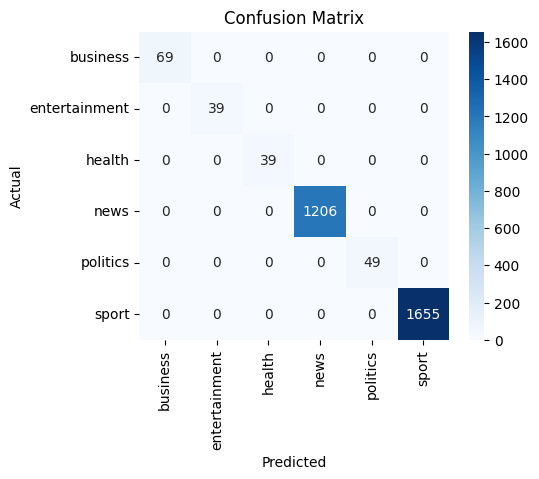

In [ ]:
plot_confusion_matrix(y_train_enc, y_pred_train_base)

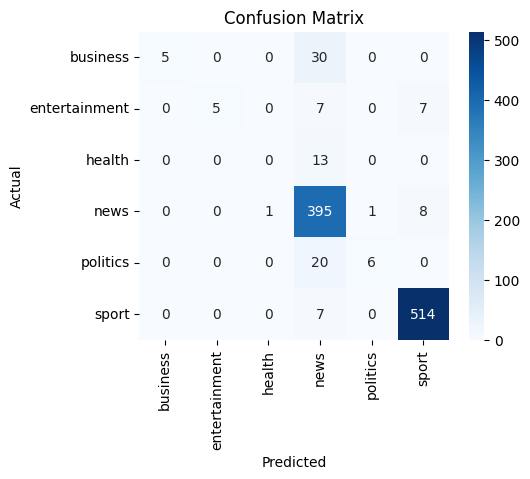

In [ ]:
plot_confusion_matrix(y_test_enc, y_pred_test_base)

In [ ]:
#Calculating different metrics on training data
word2vec_base_train=model_performance_classification_sklearn(rf_word2vec_base, X_train,y_train_enc)
print("Training performance:\n", word2vec_base_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on training data
word2vec_base_test=model_performance_classification_sklearn(rf_word2vec_base, X_test,y_test_enc)
print("Testing performance:\n", word2vec_base_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.907753  0.907753   0.904262  0.884228


#### RF model with Grid Search

In [ ]:
# Choose the type of classifier.
word2vec_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(word2vec_rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train_enc)

# Set the clf to the best combination of parameters
word2vec_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
word2vec_rf_tuned.fit(X_train, y_train_enc)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.3,
                       n_estimators=50, random_state=1)

In [ ]:
# Predicting on train data
y_pred_train_tuned = word2vec_rf_tuned.predict(X_train)

# Predicting on test data
y_pred_test_tuned = word2vec_rf_tuned.predict(X_test)

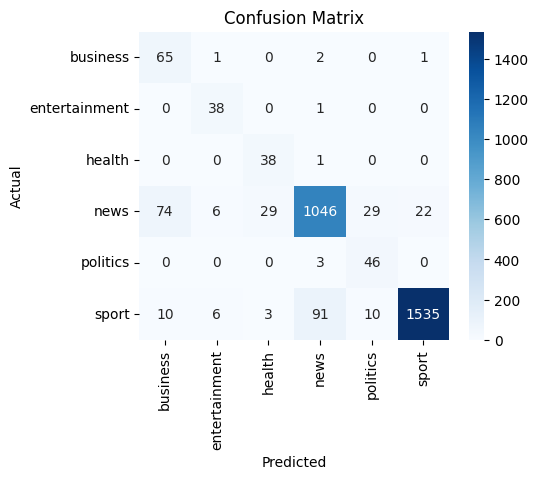

In [ ]:
plot_confusion_matrix(y_train_enc, y_pred_train_tuned)

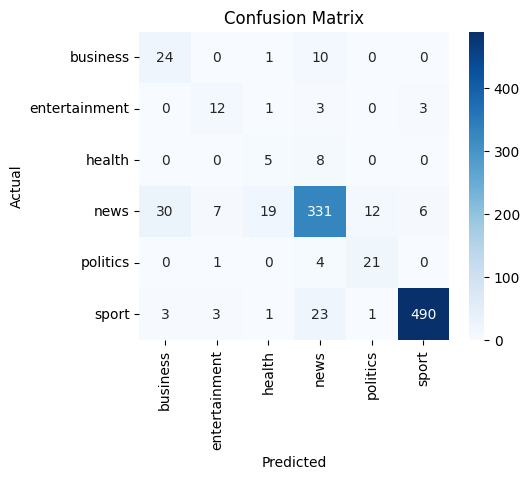

In [ ]:
plot_confusion_matrix(y_test_enc, y_pred_test_tuned)

In [ ]:
#Calculating different metrics on training data
word2vec_tuned_train=model_performance_classification_sklearn(word2vec_rf_tuned, X_train,y_train_enc)
print("Training performance:\n", word2vec_tuned_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.905463  0.905463    0.92905  0.912611


In [ ]:
#Calculating different metrics on training data
word2vec_tuned_test=model_performance_classification_sklearn(word2vec_rf_tuned, X_test,y_test_enc)
print("Testing performance:\n", word2vec_tuned_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.866536  0.866536   0.891488  0.876461


### Random Forest with GloVe

In [ ]:
# Storing independent variable
X = df_Glove.copy()

# Storing target variable
y = dataset['Category']

In [ ]:
# Split data into training and testing set.
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X ,y, test_size = 0.25, random_state = 42)

In [ ]:
# Label Encoding
encoder = LabelEncoder()

# fitting the encoder to the training labels
y_train_enc_glove = encoder.fit_transform(y_train_glove)

# applying the encoder mapping from training labels to test labels
y_test_enc_glove = encoder.transform(y_test_glove)

#### RF Base model

In [ ]:
# Building the model
rf_glovec_base = RandomForestClassifier(class_weight= "balanced",random_state = 42)

# Fitting on train data
rf_glovec_base.fit(X_train_glove, y_train_enc_glove)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predicting on train data
y_pred_train_base_gl = rf_glovec_base.predict(X_train_glove)

# Predicting on test data
y_pred_test_base_gl = rf_glovec_base.predict(X_test_glove)

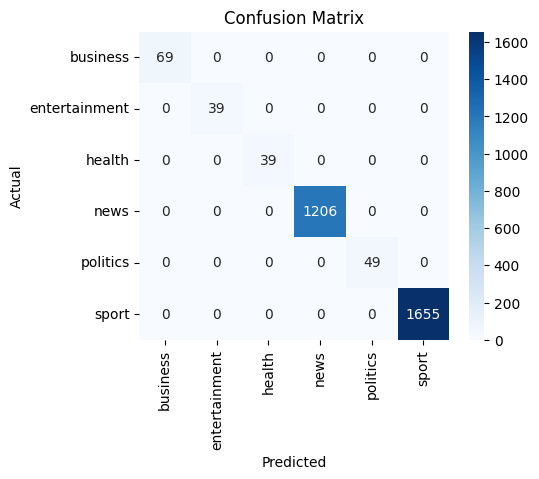

In [ ]:
plot_confusion_matrix(y_train_enc_glove, y_pred_train_base_gl)

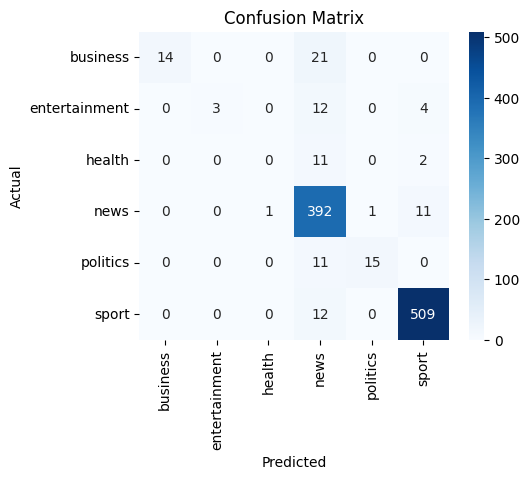

In [ ]:
plot_confusion_matrix(y_test_enc_glove, y_pred_test_base_gl)

In [ ]:
#Calculating different metrics on training data
glove_base_train=model_performance_classification_sklearn(rf_glovec_base, X_train_glove,y_train_enc_glove)
print("Training performance:\n", glove_base_train)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on training data
glove_base_test=model_performance_classification_sklearn(rf_glovec_base, X_test_glove,y_test_enc_glove)
print("Testing performance:\n", glove_base_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.915604  0.915604   0.911108  0.900709


#### RF model with Grid Search

In [ ]:
# Choose the type of classifier.
glove_rf_tuned = RandomForestClassifier(class_weight= "balanced",random_state=1,bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,110,25),
    'max_features': [0.3,0.4]
}

# Run the grid search
grid_obj = GridSearchCV(glove_rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train_enc_glove)

# Set the clf to the best combination of parameters
glove_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
glove_rf_tuned.fit(X_train_glove, y_train_enc_glove)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.3,
                       n_estimators=50, random_state=1)

In [ ]:
# Predicting on train data
y_pred_train_tuned_gl = glove_rf_tuned.predict(X_train_glove)

# Predicting on test data
y_pred_test_tuned_gl = glove_rf_tuned.predict(X_test_glove)

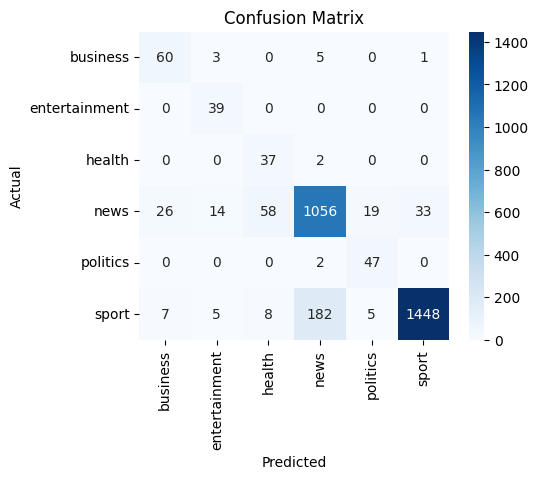

In [ ]:
plot_confusion_matrix(y_train_enc_glove, y_pred_train_tuned_gl)

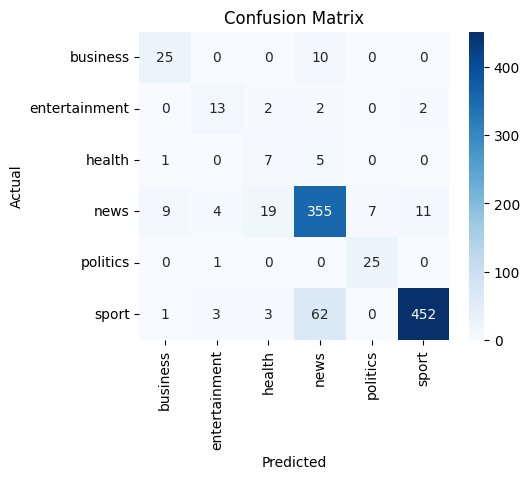

In [ ]:
plot_confusion_matrix(y_test_enc_glove, y_pred_test_tuned_gl)

In [ ]:
#Calculating different metrics on training data
glove_tuned_train=model_performance_classification_sklearn(glove_rf_tuned, X_train_glove,y_train_enc_glove)
print("Training performance:\n", glove_tuned_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.878966  0.878966   0.900951  0.885326


In [ ]:
#Calculating different metrics on training data
glove_tuned_test=model_performance_classification_sklearn(glove_rf_tuned, X_test_glove,y_test_enc_glove)
print("Testing performance:\n", glove_tuned_test)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.860648  0.860648   0.880303  0.867467


## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [word2vec_base_train.T,word2vec_tuned_train.T,glove_base_train.T,glove_tuned_train.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Word2vec - Base RF Model",
    "Word2vec - RF with Grid Search",
    "GloVe - Base RF Model",
    "GloVe - RF with Grid Search"]
print("Training performance comparison:")

models_train_comp_df

Training performance comparison:


,Word2vec - Base RF Model,Word2vec - RF with Grid Search,GloVe - Base RF Model,GloVe - RF with Grid Search
Accuracy,1.0,0.905463,1.0,0.878966
Recall,1.0,0.905463,1.0,0.878966
Precision,1.0,0.929050,1.0,0.900951
F1,1.0,0.912611,1.0,0.885326


In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [word2vec_base_test.T,word2vec_tuned_test.T,glove_base_test.T,glove_tuned_test.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Word2vec - Base RF Model",
    "Word2vec - RF with Grid Search",
    "GloVe - Base RF Model",
    "GloVe - RF with Grid Search"]
print("Testing performance comparison:")

models_test_comp_df

Testing performance comparison:


,Word2vec - Base RF Model,Word2vec - RF with Grid Search,GloVe - Base RF Model,GloVe - RF with Grid Search
Accuracy,0.907753,0.866536,0.915604,0.860648
Recall,0.907753,0.866536,0.915604,0.860648
Precision,0.904262,0.891488,0.911108,0.880303
F1,0.884228,0.876461,0.900709,0.867467


* From the above two metric tables, we can observe that **Word2vec - RF with Grid Search** model is giving generalized results.

In [ ]:
label_list = encoder.classes_.tolist()
print(classification_report(y_test_enc, y_pred_test_tuned, target_names=label_list))

               precision    recall  f1-score   support

     business       0.42      0.69      0.52        35
entertainment       0.52      0.63      0.57        19
       health       0.19      0.38      0.25        13
         news       0.87      0.82      0.84       405
     politics       0.62      0.81      0.70        26
        sport       0.98      0.94      0.96       521

     accuracy                           0.87      1019
    macro avg       0.60      0.71      0.64      1019
 weighted avg       0.89      0.87      0.88      1019



## Conclusion

- We analyzed the distribution of categories of the article.

- We used different text processing techniques to clean the raw text data.

- We then built ML models (Random Forest) with the word embeddings created using Word2vec and GloVe.

- We then tuned the ML models built using GridSearch to improve the performance

- The tuned Random Forest model using Word2vec embeddings is taken as our final model as it has a good performance overall (86\% accuracy and 86\% recall).
    - The model can be tuned further or a different model can be trained to model the data better.

- The company can deploy this model to categorize future articles based on the article text.

- The model does well in the sports, politics, news, and business categories. This coincides with the categories where the number of training and testing samples were higher in number.

- The model does not do very well in the entertainment and health categories as there aren't many training samples available here.
    - The company can collect more samples of these categories and retrain the model to get a better prediction.

<font size=6 color='blue'>Power Ahead</font>
___